# Stationarity, MA(q) and AR(p) processes

> We will introduce few important notions in time series analysis: Stationarity, Backward shift operator, Invertibility, and Duality. We begin to explore Autoregressive processes and Yule-Walker equations.This is the Summary of lecture "Practical Time Series Analysis" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [R, Coursera, Time_Series_Analysis]
- image: 

In [1]:
options(repr.plot.width = 16, repr.plot.height = 9)

## Stationarity - Generalizing from an individual to a group

### Stationarity - White Noise and Random Walks

#### White noise is Stationary

Consider a discrete family of independent, identically distributed normal random variables (often Gaussian)

$$ X_t \sim iid(0, \sigma^2) $$
$$ X_t \sim iid N(0, \sigma^2) $$

Mean function $\mu(t) = 0$ is obviously constant, so consider

$$ \gamma(t_1, t_2) = \begin{cases} 0 \quad t_1 \neq t_2 \\ \sigma^2 \quad t_1 = t_2 \end{cases} $$

#### Random Walks are not stationary!

Started with IID Random variables $Z_t \sim iid (\mu, \sigma^2)$

Build a walk with $t$ steps

$$ X_1 = Z_1 \\ X_2 = X_1 + Z_2 = Z_1 + Z_2 \\
X_3 = X_2 + Z_3 = Z_1 + Z_2 + Z_3 \\ \vdots \\
X_t = X_{t-1} + Z_t = \sum_{i=1}^t Z_i $$

$$ \mathbb{E}[X_t] = \mathbb{E}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{E}[Z_i] = t \cdot \mu \\
 \mathbb{V}[X_t] = \mathbb{V}[\sum_{i=1}^t Z_i] = \sum_{i=1}^t \mathbb{V}[Z_i] = t \cdot \sigma^2 $$
 
> Note: Independent random variables have variances which add. All random variables have means which add.

#### Moving Average Processes are Stationary!

Start with IID random variables $Z_t \sim iid(0, \sigma^2)$

$$ MA(q)\text{ process: } \qquad X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \cdots + \beta_q Z_{t-q} $$

$q$ tells us how far back to look along the white noise sequence for our weighted average.

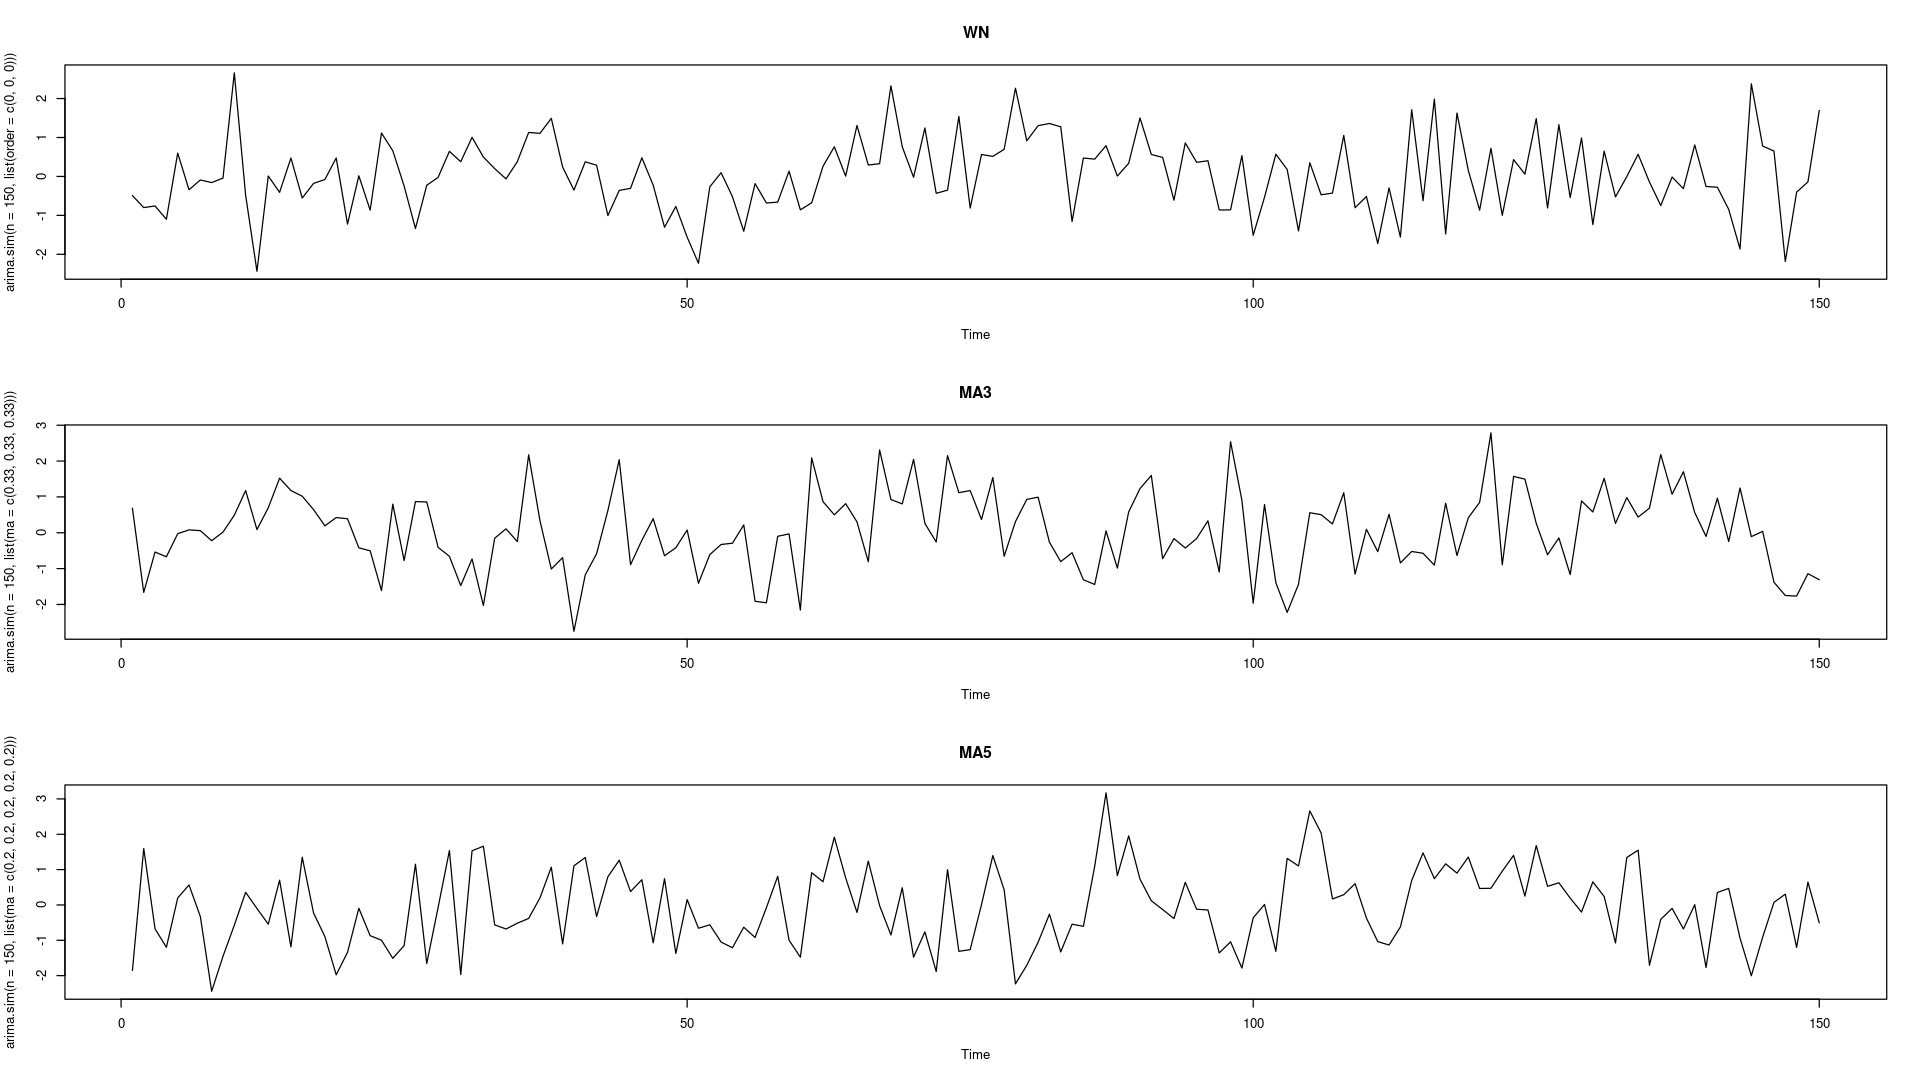

In [2]:
par(mfrow=c(3,1))
plot( arima.sim(n=150, list(order=c(0,0,0) )  ), main="WN" );
plot( arima.sim(n=150, list(ma=c(0.33, 0.33, 0.33)      )  ) , main="MA3");
plot( arima.sim(n=150, list(ma=c(0.2, 0.2, 0.2, 0.2, 0.2) )  ), main="MA5" );

### Stationarity - ACF of Moving Average

#### Moving Average Processes are stationary!

Look at the covariance at two locations along a moving average process:

$$ cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] - \mathbb{E}[X_t] \mathbb{E}[X_{t+k}] \\
\mathbb{E}[X_t] = \mathbb{E}[X_{t+k}] = 0 \Rightarrow cov[X_t, X_{t+k}] = \mathbb{E}[X_t, X_{t+k}] \\ 
cov[X_t, X_{t+k}] = \mathbb{E}[(\beta_0 Z_t + \cdots + \beta_q Z_{t-q}) \cdot (\beta_0 Z_{t+k} + \cdots + \beta_q Z_{t+l-q})]$$

### Series and Series Representation

#### Sequence and series
- Sequence $\{a_n\}$ is list of numbers in definite order

$$ a_1, a_2, a_3, \dots, a_n, $$

- If the limit of the sequence exists, i.e.

$$ \lim_{n \to \infty} a_n = a $$

then we say the sequence is convergent.

#### Partial sums
Partial sums of a sequence $\{a_n\}$ are defined as

$$ s_n = a_1 + a_2 + \dots + a_n $$

#### Series

- If the partial sums $\{s_n\}$ is convergent to a number $s$, then we say the infinite series $\sum_{k=1}^{\infty}a_k$ is convergent, and is equal to $s$.

$$ \sum_{k=1}^{\infty} a_k = \lim_{n \to \infty} s_n  = \lim_{n \to \infty}(a_1 + a_2 + \dots + a_n) = s $$

- Otherwise, we say $\sum_{k=1}^{\infty}a_k$ is divergent.

#### Absolute convergence

- Series is absolutely convergent if

$$ \sum_{k=1}^{\infty} \vert a_k \vert $$

is convergent.

- Absolute convergence implies convergence.

#### Convergence tests

- Integral test
- Comparison test
- Limit comparision test
- Alternating series test
- Ratio test
- Root test

#### Geometric series

- Geometric sequence

$$ \{a r^{n-1}\}_{n=1}^{\infty} = \{a, ar, ar^2, ar^3, \dots\} $$

- Geometric series

$$ \sum_{k=1}^{\infty} a r^{k-1} = \frac{a}{1 - r} \quad \text{if } \vert r \vert < 1 $$

#### Series representation

- Series representation for $\frac{1}{1 - x}$ where $a = 1, r = x$.

$$ \frac{1}{1 - x} = 1 + x + x^2 + x^3 + \dots \quad \text{ if } \vert x \vert < 1$$

- Series representation for $\frac{1}{(1-x)(1-\frac{x}{2})}$

$$ \frac{1}{(1-x)(1-\frac{x}{2})} = \frac{2}{(1 - x)} + \frac{-1}{1 - \frac{x}{2}} = \sum_{k=0}^{\infty}(2 - \frac{1}{2^k}) x^k \\
\text{if } \vert x \vert < 1 \text{ and } \vert \frac{x}{2} \vert < 1$$

#### Complex functions

Assume $z$ is a complex number

$$ \frac{a}{1-z} = a + az + az^2 + \dots = \sum_{k=1}^{\infty}az^{k-1} \quad \text{ if } \vert z \vert < 1 $$

### Backward shift operator

#### Definition

- $X_1, X_2, X_3, \dots $
- **Backward shift operator** is defined as

$$ BX_t = X_{t-1} $$

- $B^2 X_t = B B X_t = B X_{t-1} = X_{t-2} $
- $B^k X_t = X_{t-k}$

#### Example - Random walk

$$ X_t = X_{t-1} + Z_t \\
X_t = B X_{t} + Z_t \\ 
(1 - B)X_t = Z_t \\
\phi(B)X_t = Z_t \\
\text{where } \phi(B) = 1 - B $$

#### MA(q) process (with a drift)

$$ X_t = \mu + \beta_0 Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q} $$

Then,

$$ X_t = \mu + \beta_0 Z_t + \beta_1 B^1 Z_{t-1} + \dots + \beta_q B^q Z_{t-q} \\
 X_t - \mu = \beta(B)Z_t $$
 
where,

$$ \beta(B) = \beta_0 + \beta_1 B + \dots + \beta_q B^q $$